<a href="https://colab.research.google.com/github/IAmirKhani/Analyzing-and-Predicting-130-US-hospitals-Diabetes-Readmission/blob/main/Project_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mohammadamir Khani

Project 5

Student ID: 9833026

# 1. Import the necessary libraries.

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


# 2. Load the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading the data
df = pd.read_csv('drive/My Drive/Eighth Semester/AI course/projects/Project 5/diabetic_data.csv')

In [5]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# 3. Pre-processing

##3.1. Removing duplicated data

In [6]:
# Shape of the dataset
prev_shape = df.shape
print(f' The shape of the dataset: {prev_shape} \n Number of records: {prev_shape[0]} \n Number of columns: {prev_shape[1]}.')

 The shape of the dataset: (101766, 50) 
 Number of records: 101766 
 Number of columns: 50.


In [7]:
print(f'The total number of hospital admissions: {len(df["encounter_id"].unique()):,}.')
print(f'The number of unique patient in dataset: {len(df["patient_nbr"].unique()):,}.')

The total number of hospital admissions: 101,766.
The number of unique patient in dataset: 71,518.


In [8]:
# Keep only the first encounter for each patient
df.drop_duplicates(subset='patient_nbr', keep='first', inplace = True)

In [9]:
print(f' The number of rows after removing duplicated encounters: {df.shape[0]:,} ({prev_shape[0] - df.shape[0]:,} encounter has been removed) \n The previous number of rows was: {prev_shape[0]:,}')

 The number of rows after removing duplicated encounters: 71,518 (30,248 encounter has been removed) 
 The previous number of rows was: 101,766


In [10]:
# What are the columns of the dataset
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

The *last column* is the **lable** of the data which is indicated by '***readmitted***' and contains three classes: No, <30, >30

##3.2. Dealing with missing value

Databases like this often have a lot of missing values. Columns with more missing values than actual data can be dropped from the dataset, as we cannot extract reliable or eligible data from them.

In [11]:
# Finding how many missing value exist in each column
for i in range(len(df.columns)):
    print(df.columns[i], df[df[df.columns[i]]  == '?'].shape[0])

encounter_id 0
patient_nbr 0
race 1948
gender 0
age 0
weight 68665
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
payer_code 31043
medical_specialty 34477
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
diag_1 11
diag_2 294
diag_3 1225
number_diagnoses 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [12]:
for i in range(len(df.columns)):
    temp = df[df[df.columns[i]] == '?'].shape[0]
    if temp > 0:
        column_name = f'"{df.columns[i]}"'
        missing_values = f'{temp} missing values'
        print(f'{column_name:<20} has: {missing_values}')

"race"               has: 1948 missing values
"weight"             has: 68665 missing values
"payer_code"         has: 31043 missing values
"medical_specialty"  has: 34477 missing values
"diag_1"             has: 11 missing values
"diag_2"             has: 294 missing values
"diag_3"             has: 1225 missing values


In [13]:
# As it seems 'wieght', 'medical_specialty' and 'payer_code' columns has a lots of missing value.
# We can drop these columns to make data more clear.
df.drop(columns = ['weight', 'medical_specialty', 'payer_code'], inplace = True)

In [14]:
for i in range(len(df.columns)):
    temp = df[df[df.columns[i]] == '?'].shape[0]
    if temp > 0:
        column_name = f'"{df.columns[i]}"'
        missing_values = f'{temp} missing values'
        print(f'{column_name:<20} has: {missing_values}')

"race"               has: 1948 missing values
"diag_1"             has: 11 missing values
"diag_2"             has: 294 missing values
"diag_3"             has: 1225 missing values


In [15]:
df.loc[df['race'] == '?', 'race'] = np.nan

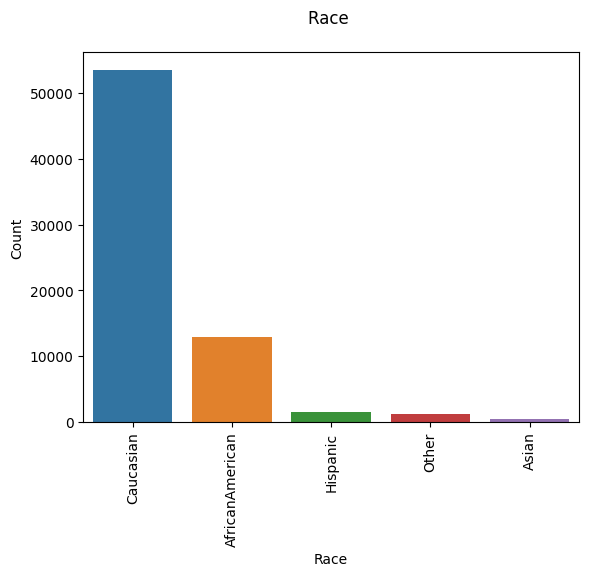

In [16]:
race_index = df['race'].value_counts().index
race_value = df['race'].value_counts()

ax = sns.barplot(x = race_index,   y = race_value)
plt.xlabel('Race')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Race \n')
plt.show()

In [17]:
df['race'].fillna(df['race'].mode()[0], inplace = True)

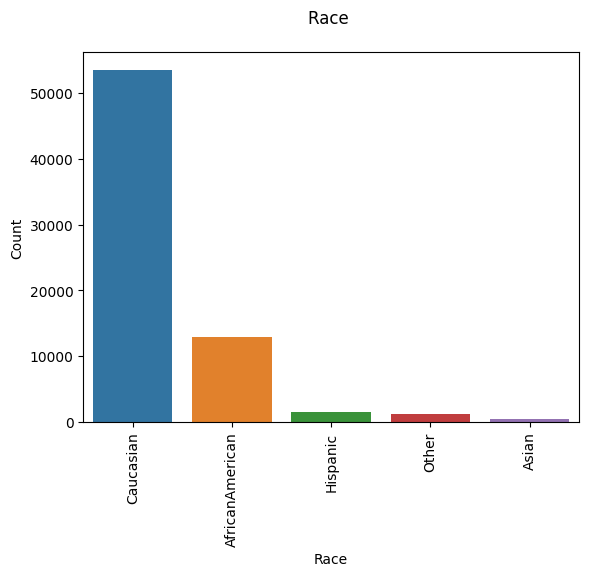

In [18]:
ax = sns.barplot(x = race_index,   y = race_value)
plt.xlabel('Race')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Race \n')
plt.show()

Now we want to look at genders. One of the challenges with gender is that we have a label called 'unknown/invalid.' This label could cause problems later on, so I would prefer to drop it.

In [19]:
df['gender'].value_counts()

Female             38025
Male               33490
Unknown/Invalid        3
Name: gender, dtype: int64

As we can see, there are three rows with the label 'Unknown/Invalid.' We will remove these rows.

In [20]:
df.drop(df[df['gender'] == 'Unknown/Invalid'].index, inplace = True)

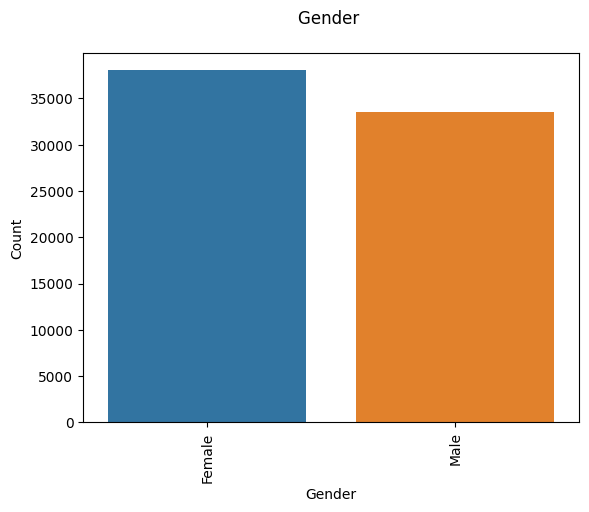

In [21]:
gender_index = df['gender'].value_counts().index
gender_value = df['gender'].value_counts()

ax = sns.barplot(x = gender_index,   y = gender_value)
plt.xlabel('Gender')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Gender \n')
plt.show()

In [22]:
diag_1 = Counter(list(df['diag_1'])).most_common(1)[0][0]
diag_2 = Counter(list(df['diag_2'])).most_common(1)[0][0]
diag_3 = Counter(list(df['diag_3'])).most_common(1)[0][0]

df['diag_1'] = df['diag_1'].apply(lambda x : diag_1 if x == '?' else x)
df['diag_2'] = df['diag_1'].apply(lambda x : diag_2 if x == '?' else x)
df['diag_3'] = df['diag_3'].apply(lambda x : diag_3 if x == '?' else x)

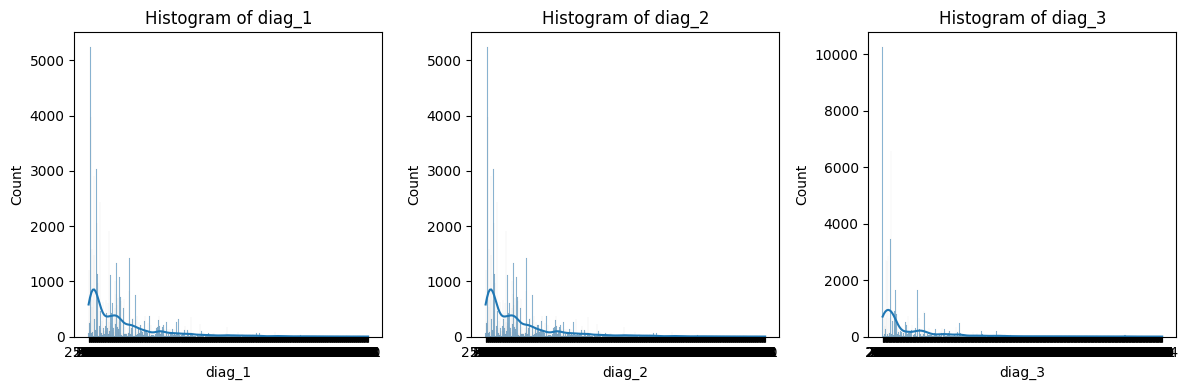

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot histogram for diag_1
sns.histplot(data=df['diag_1'], kde=True, discrete=True, ax=axes[0])
axes[0].set_xlabel('diag_1')
axes[0].set_ylabel('Count')
axes[0].set_title('Histogram of diag_1')

# Plot histogram for diag_2
sns.histplot(data=df['diag_2'], kde=True, discrete=True, ax=axes[1])
axes[1].set_xlabel('diag_2')
axes[1].set_ylabel('Count')
axes[1].set_title('Histogram of diag_2')

# Plot histogram for diag_3
sns.histplot(data=df['diag_3'], kde=True, discrete=True, ax=axes[2])
axes[2].set_xlabel('diag_3')
axes[2].set_ylabel('Count')
axes[2].set_title('Histogram of diag_3')

plt.tight_layout()
plt.show()

In [24]:
for i in range(len(df.columns)):
    print(df.columns[i], df[df[df.columns[i]]  == '?'].shape[0])

encounter_id 0
patient_nbr 0
race 0
gender 0
age 0
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
diag_1 0
diag_2 0
diag_3 0
number_diagnoses 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


## 3.3. Statics of data

In [25]:
# Showing some statics of data using pandas built-in functions.
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
encounter_id,71515.0,NaN,NaN,NaN,156814016.35861,100377705.583171,12522.0,81455820.0,144051498.0,215542176.0,443867222.0
patient_nbr,71515.0,NaN,NaN,NaN,55050566.464798,39476087.329747,135.0,23375475.0,48164913.0,87522196.5,189502619.0
race,71515,5,Caucasian,55437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,71515,2,Female,38025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,71515,10,[70-80),18208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,71515.0,NaN,NaN,NaN,2.100273,1.508318,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,71515.0,NaN,NaN,NaN,3.59305,5.269414,1.0,1.0,1.0,3.0,28.0
admission_source_id,71515.0,NaN,NaN,NaN,5.657484,4.162625,1.0,1.0,7.0,7.0,25.0
time_in_hospital,71515.0,NaN,NaN,NaN,4.28917,2.949188,1.0,2.0,3.0,6.0,14.0
num_lab_procedures,71515.0,NaN,NaN,NaN,43.075858,19.952151,1.0,31.0,44.0,57.0,132.0


## 3.4. Analyzing the lebel of data

In [26]:
readmitted = dict(df['readmitted'].value_counts())
readmitted_index = df['readmitted'].value_counts().index
print(readmitted)

{'NO': 42982, '>30': 22240, '<30': 6293}


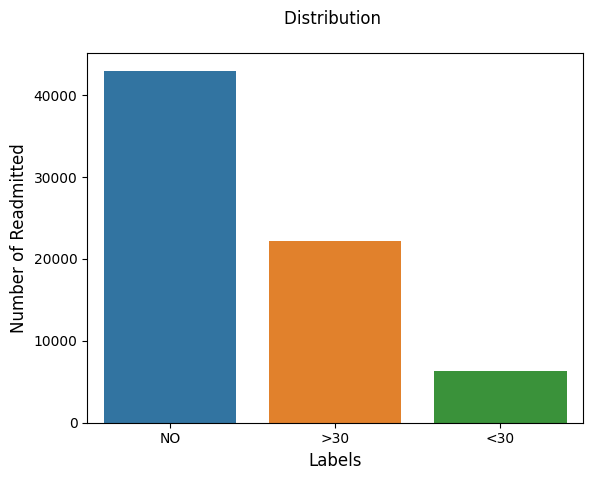

In [27]:
# Now we try to visualize the readmitted column.
ax = sns.barplot(x = df['readmitted'].value_counts().index, y = df['readmitted'].value_counts())
plt.xlabel('Labels', size = 12)
plt.ylabel('Number of Readmitted', size = 12)
plt.title('Distribution \n', size = 12)
plt.show()

In [28]:
df['modified_readmitted_1'] = df['readmitted'].apply(lambda label: 0 if label == '>30' or label == 'NO' else 1)

In [29]:
df['modified_readmitted_1'].value_counts()

0    65222
1     6293
Name: modified_readmitted_1, dtype: int64

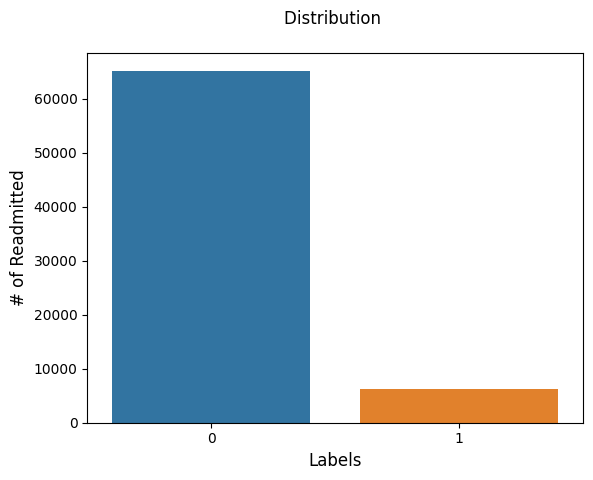

In [30]:
ax = sns.barplot(x = df['modified_readmitted_1'].value_counts().index, y = df['modified_readmitted_1'].value_counts())
plt.xlabel('Labels', size = 12)
plt.ylabel('# of Readmitted', size = 12)
plt.title('Distribution \n', size = 12)
plt.show()

In [31]:
df['modified_readmitted_2'] = df['readmitted'].apply(lambda label: 1 if label == '>30' or label == '<30' else 0)

In [32]:
df['modified_readmitted_2'].value_counts()

0    42982
1    28533
Name: modified_readmitted_2, dtype: int64

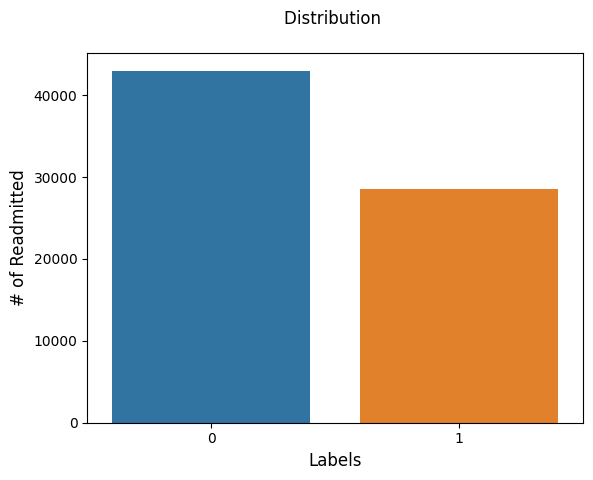

In [33]:
ax = sns.barplot(x = df['modified_readmitted_2'].value_counts().index, y = df['modified_readmitted_2'].value_counts())
plt.xlabel('Labels', size = 12)
plt.ylabel('# of Readmitted', size = 12)
plt.title('Distribution \n', size = 12)
plt.show()

In [34]:
df['modified_readmitted_3'] = df['readmitted'].apply(lambda x: 0 if x == 'NO' else (1 if x == '<30' else 2))

In [35]:
df['modified_readmitted_3'].value_counts()

0    42982
2    22240
1     6293
Name: modified_readmitted_3, dtype: int64

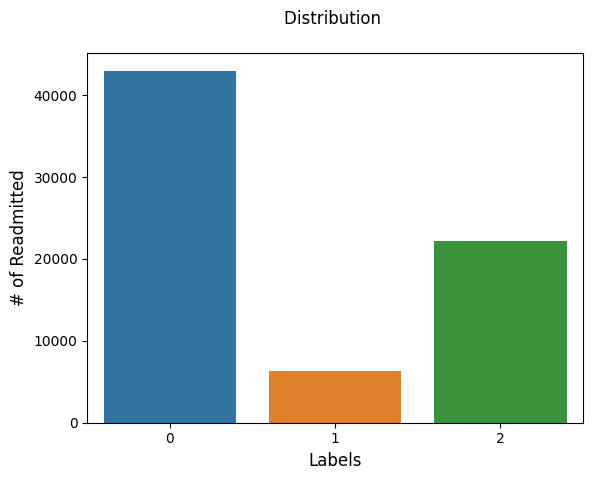

In [36]:
ax = sns.barplot(x = df['modified_readmitted_3'].value_counts().index, y = df['modified_readmitted_3'].value_counts())
plt.xlabel('Labels', size = 12)
plt.ylabel('# of Readmitted', size = 12)
plt.title('Distribution \n', size = 12)
plt.show()

# 4. Feature Engineering


In [37]:
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)

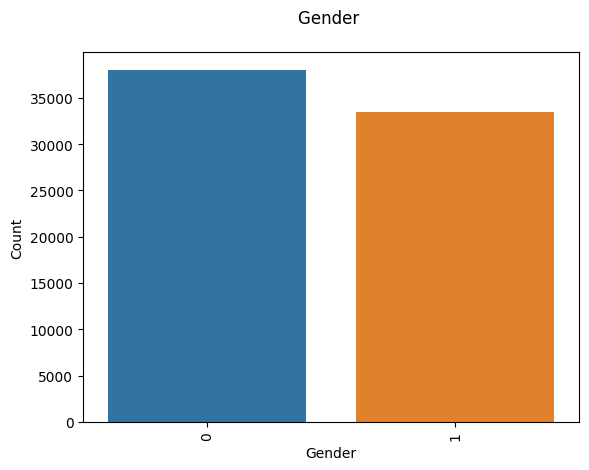

In [38]:
gender_index = df['gender'].value_counts().index
gender_value = df['gender'].value_counts()

ax = sns.barplot(x = gender_index,   y = gender_value)
plt.xlabel('Gender')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Gender \n')
plt.show()

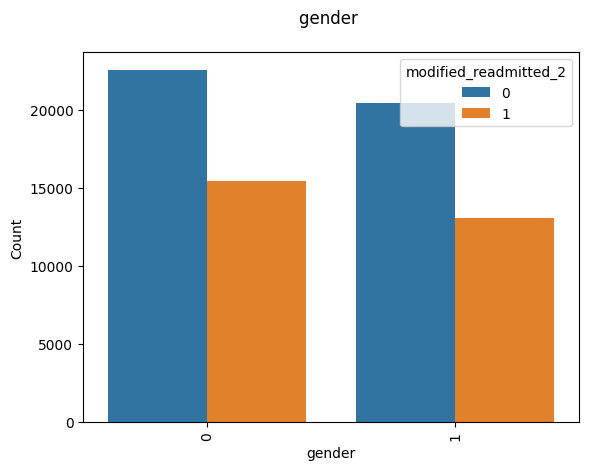

In [39]:
age_index = df['gender'].value_counts().index
age_value = df['gender'].value_counts()

ax = sns.countplot(x = 'gender', hue = 'modified_readmitted_2', data = df)
plt.xlabel('gender')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('gender \n')
plt.show()

In [40]:
# As we can see the values of age feature are given like [0–10),[10–20),[20–30),... so we need to change them:
replaceDict = {'[0-10)' : 5,
'[10-20)' : 15,
'[20-30)' : 25, 
'[30-40)' : 35, 
'[40-50)' : 45, 
'[50-60)' : 55,
'[60-70)' : 65, 
'[70-80)' : 75,
'[80-90)' : 85,
'[90-100)' : 95}

df['age'] = df['age'].apply(lambda x : replaceDict[x])
print(df['age'].head())

0     5
1    15
2    25
3    35
4    45
Name: age, dtype: int64


Now I want to fill missing values of diag_1, diag_2, diag_3.

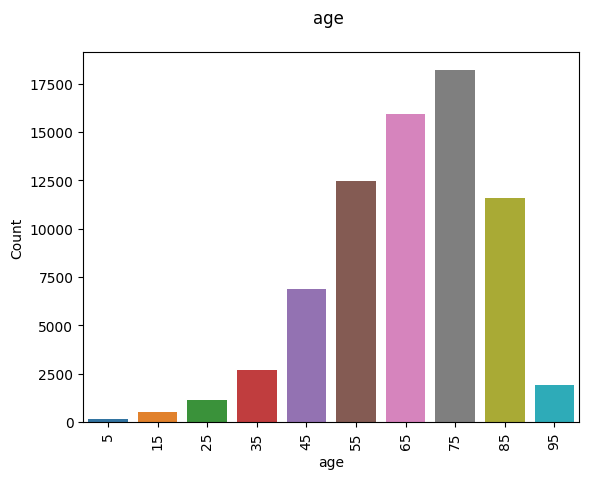

In [41]:
age_index = df['age'].value_counts().index
age_value = df['age'].value_counts()

ax = sns.barplot(x = age_index, y = age_value)
plt.xlabel('age')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('age \n')
plt.show()

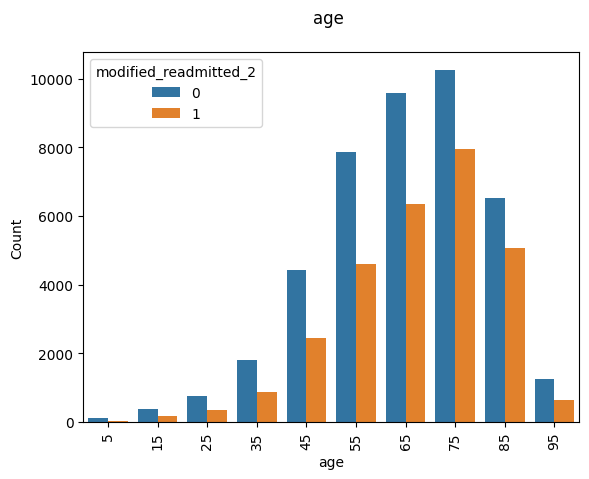

In [42]:
age_index = df['age'].value_counts().index
age_value = df['age'].value_counts()

ax = sns.countplot(x = 'age', hue = 'modified_readmitted_2', data = df)
plt.xlabel('age')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('age \n')
plt.show()

In [43]:
df['admission_type_id'].value_counts()

1    36488
3    13916
2    13028
6     4588
5     3174
8      291
7       21
4        9
Name: admission_type_id, dtype: int64

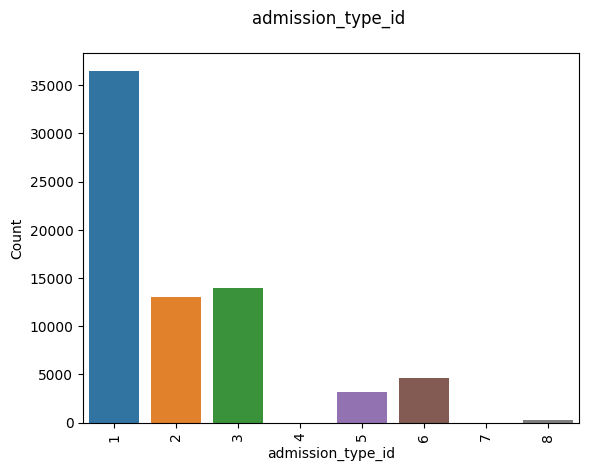

In [44]:
admission_type_id_index = df['admission_type_id'].value_counts().index
admission_type_id_value = df['admission_type_id'].value_counts()

ax = sns.barplot(x = admission_type_id_index, y = admission_type_id_value)
plt.xlabel('admission_type_id')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('admission_type_id \n')
plt.show()

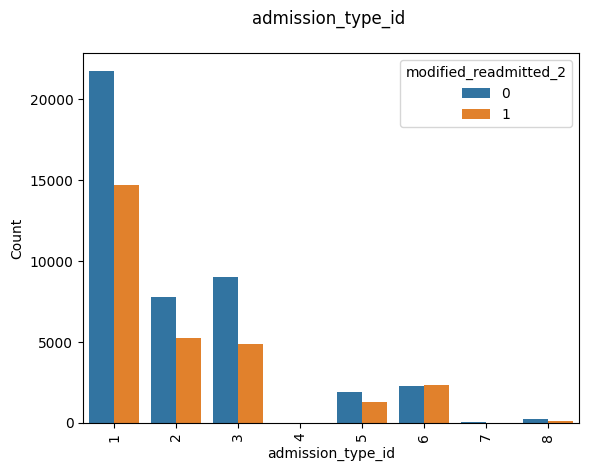

In [45]:
age_index = df['admission_type_id'].value_counts().index
age_value = df['admission_type_id'].value_counts()

ax = sns.countplot(x = 'admission_type_id', hue = 'modified_readmitted_2', data = df)
plt.xlabel('admission_type_id')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('admission_type_id \n')
plt.show()

In [46]:
print(np.unique(df['admission_type_id']))

[1 2 3 4 5 6 7 8]


In [47]:
df['admission_type_id'] = df['admission_type_id'].replace(2, 1)
df['admission_type_id'] = df['admission_type_id'].replace(7, 1)
df['admission_type_id'] = df['admission_type_id'].replace(6, 5)
df['admission_type_id'] = df['admission_type_id'].replace(8, 5)

In [48]:
df['admission_type_id'].value_counts()

1    49537
3    13916
5     8053
4        9
Name: admission_type_id, dtype: int64

In [49]:
temp_df = df.copy(deep=True)
temp_df['admission_type_id'] = temp_df['admission_type_id'].replace(1, 'Emergency')
temp_df['admission_type_id'] = temp_df['admission_type_id'].replace(3, 'Elective')
temp_df['admission_type_id'] = temp_df['admission_type_id'].replace(4, 'Newborn')
temp_df['admission_type_id'] = temp_df['admission_type_id'].replace(5, 'Not Available')

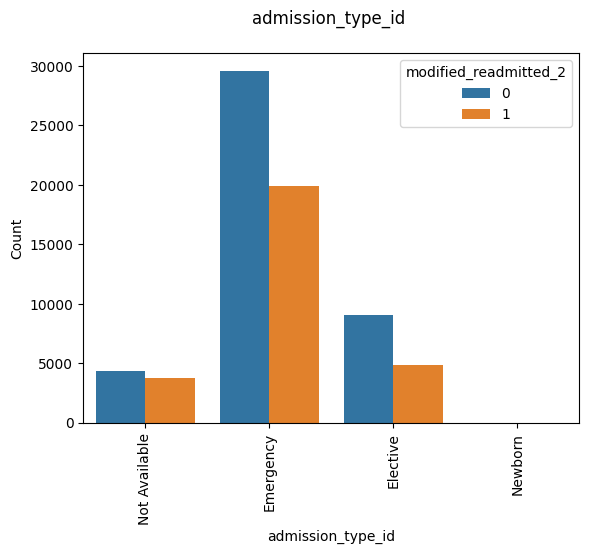

In [50]:
ax = sns.countplot(x = 'admission_type_id',  hue ='modified_readmitted_2' ,data = temp_df)
plt.xlabel('admission_type_id')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('admission_type_id \n')
plt.show()

In [51]:
df['discharge_disposition_id'].value_counts()

1     44315
3      8784
6      8289
18     2474
2      1539
22     1409
11     1077
5       913
25      778
4       541
7       409
23      260
13      243
14      218
28       90
8        73
15       40
24       25
9         9
17        8
10        6
19        6
27        3
16        3
12        2
20        1
Name: discharge_disposition_id, dtype: int64

In [52]:
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace({
    6: 1,
    8: 1,
    9: 1,
    13: 1,
    3: 2,
    4: 2,
    5: 2,
    14: 2,
    22: 2,
    23: 2,
    24: 2,
    12: 10,
    15: 10,
    16: 10,
    17: 10,
    19: 11,
    20: 11,
    21: 11,
    25: 18,
    26: 18,
})

df = df[df['discharge_disposition_id'].isin([1, 2, 10, 11, 18])]

In [53]:
temp_df = df.copy(deep=True)
temp_df['discharge_disposition_id'] = temp_df['discharge_disposition_id'].replace(1, 'Discharged to home')
temp_df['discharge_disposition_id'] = temp_df['discharge_disposition_id'].replace(2, 'Discharged/transferred to another short term hospital')
temp_df['discharge_disposition_id'] = temp_df['discharge_disposition_id'].replace(10, 'Neonate discharged to another hospital for neonatal aftercare')
temp_df['discharge_disposition_id'] = temp_df['discharge_disposition_id'].replace(11, 'Expired')
temp_df['discharge_disposition_id'] = temp_df['discharge_disposition_id'].replace(18, 'NULL')

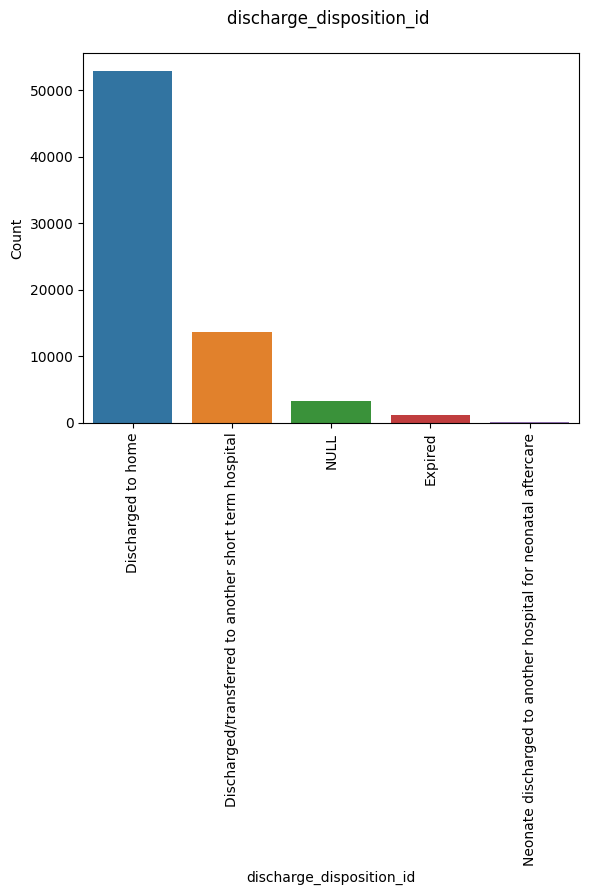

In [54]:
discharge_disposition_id_index = temp_df['discharge_disposition_id'].value_counts().index
discharge_disposition_id_value = temp_df['discharge_disposition_id'].value_counts()

ax = sns.barplot(x = discharge_disposition_id_index, y = discharge_disposition_id_value)
plt.xlabel('discharge_disposition_id')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('discharge_disposition_id \n')
plt.show()

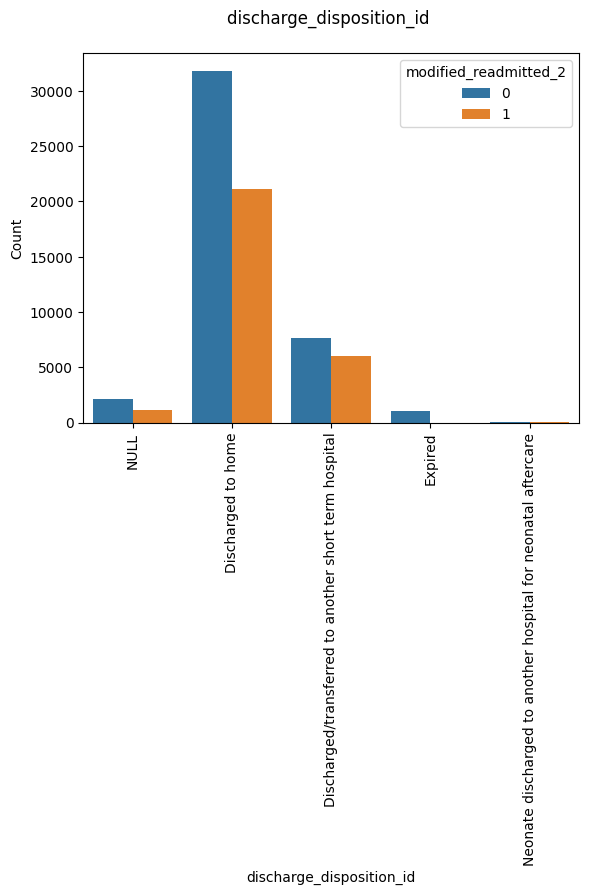

In [55]:
ax = sns.countplot(x = 'discharge_disposition_id',  hue ='modified_readmitted_2' ,data = temp_df)
plt.xlabel('discharge_disposition_id')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('discharge_disposition_id \n')
plt.show()

In [56]:
df['admission_source_id'].value_counts()

7     37927
1     21906
17     4933
4      2576
6      1791
2       918
5       545
20      155
3       138
9        95
8        12
10        7
22        4
14        2
25        2
11        1
13        1
Name: admission_source_id, dtype: int64

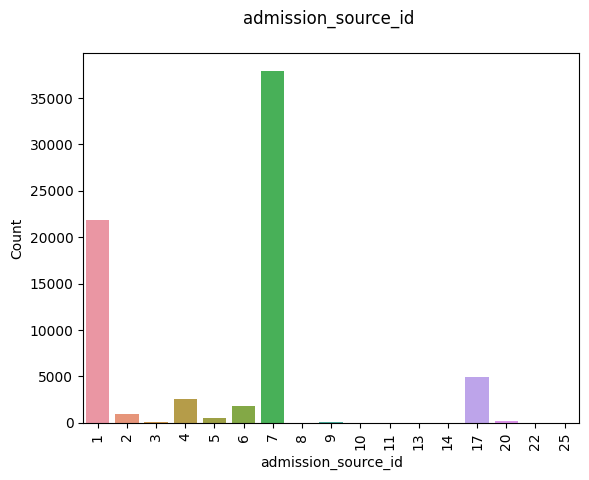

In [57]:
race_index = df['admission_source_id'].value_counts().index
race_value = df['admission_source_id'].value_counts()

ax = sns.barplot(x = race_index,   y = race_value)
plt.xlabel('admission_source_id')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('admission_source_id \n')
plt.show()

In [58]:
def admission_source_converter(x):
  if x == 1 or x == 2 or x == 3:
    return 0
  elif x == 7:
    return 1
  else:
    return 2

df['admission_source_id'] = df['admission_source_id'].apply(admission_source_converter)

In [59]:
df['admission_source_id'].value_counts()

1    37927
0    22962
2    10124
Name: admission_source_id, dtype: int64

In [60]:
temp_df = df.copy(deep=True)
temp_df['admission_source_id'] = temp_df['admission_source_id'].replace(0, 'Physician Clinic Referral')
temp_df['admission_source_id'] = temp_df['admission_source_id'].replace(1, 'Emergency Room')
temp_df['admission_source_id'] = temp_df['admission_source_id'].replace(2, 'Other')

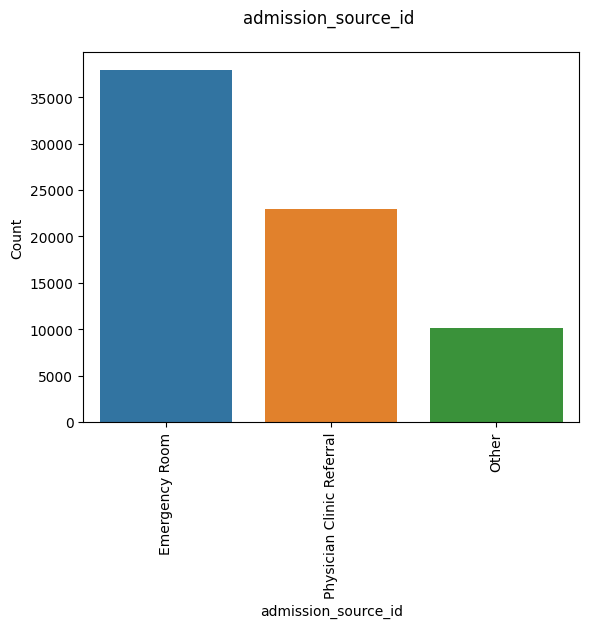

In [61]:
admission_source_id_index = temp_df['admission_source_id'].value_counts().index
admission_source_id_value = temp_df['admission_source_id'].value_counts()

ax = sns.barplot(x = admission_source_id_index, y = admission_source_id_value)
plt.xlabel('admission_source_id')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('admission_source_id \n')
plt.show()

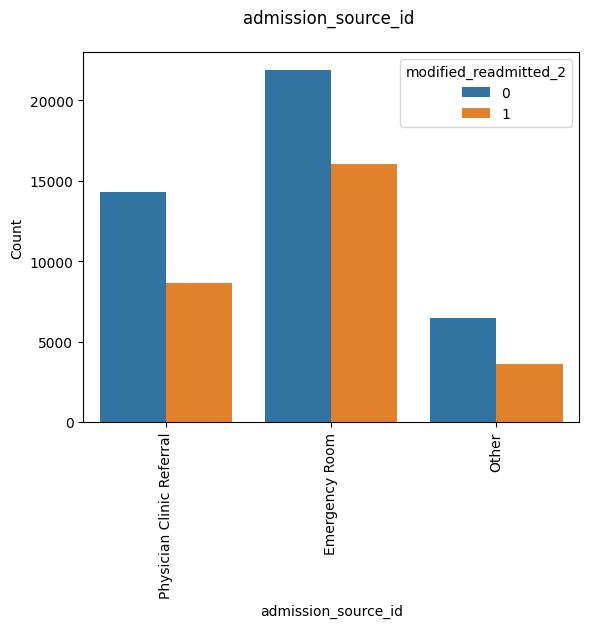

In [62]:
ax = sns.countplot(x = 'admission_source_id',  hue ='modified_readmitted_2' ,data = temp_df)
plt.xlabel('admission_source_id')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('admission_source_id \n')
plt.show()

In [63]:
# Print the number of unique values in 'diag_1', 'diag_2', and 'diag_3'
print(len(np.unique(df['diag_1'])))  
print(len(np.unique(df['diag_2'])))  
print(len(np.unique(df['diag_3'])))  

# Apply a mapping function to categorize values in 'diag_1', 'diag_2', and 'diag_3'
df['diag_1'] = df['diag_1'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else     ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

df['diag_2'] = df['diag_2'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

df['diag_3'] = df['diag_3'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))  

# Print the updated unique values of 'diag_1', 'diag_2', and 'diag_3'
print(np.unique(df['diag_1']), '\n')           
print(np.unique(df['diag_2']), '\n')
print(np.unique(df['diag_3']), '\n') 

694
694
757
['circulatory' 'diabetes' 'digestive' 'genitourinary' 'injury'
 'musculoskeletal' 'neoplasms' 'other' 'pregnecy' 'respiratory'] 

['circulatory' 'diabetes' 'digestive' 'genitourinary' 'injury'
 'musculoskeletal' 'neoplasms' 'other' 'pregnecy' 'respiratory'] 

['circulatory' 'diabetes' 'digestive' 'genitourinary' 'injury'
 'musculoskeletal' 'neoplasms' 'other' 'pregnecy' 'respiratory'] 



In [64]:
# Replace values in the 'max_glu_serum' column
df['max_glu_serum'] = df['max_glu_serum'].replace({
    '>200': 200,
    '>300': 300,
    'Norm': 100,
})

In [65]:
# Replace values in the 'A1Cresult' column
df['A1Cresult'] = df['A1Cresult'].replace({
    '>7': 7,
    '>8': 8,
    'Norm': 5,
})

In [66]:
# Map specific values in columns to numeric values
# - Columns: ["metformin", "repaglinide", "nateglinide", ...]
# - Map 'Up' to 10, 'Down' to -10, 'Steady' to 0, and fill missing values with -20

columns = ["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone", 'citoglipton', 'examide']

for col in columns:
    df[col] = df[col].map({'Up': 10, 'Down': -10, 'Steady': 0}).fillna(-20)

# Map values in 'change' column to numeric values: 'Ch' to 1, 'No' to -1
df['change'] = df['change'].map({'Ch': 1, 'No': -1})

# Map values in 'diabetesMed' column to numeric values: 'No' to -1, 'Yes' to 1
df['diabetesMed'] = df['diabetesMed'].map({'No': -1, 'Yes': 1})


In [67]:
for column in columns:
  print(f'in {column} there is:\n\n {df[column].value_counts()} \n')

in metformin there is:

 -20.0    56105
 0.0     13639
 10.0      834
-10.0      435
Name: metformin, dtype: int64 

in repaglinide there is:

 -20.0    70089
 0.0       823
 10.0       72
-10.0       29
Name: repaglinide, dtype: int64 

in nateglinide there is:

 -20.0    70517
 0.0       472
 10.0       16
-10.0        8
Name: nateglinide, dtype: int64 

in chlorpropamide there is:

 -20.0    70941
 0.0        67
 10.0        4
-10.0        1
Name: chlorpropamide, dtype: int64 

in glimepiride there is:

 -20.0    67280
 0.0      3361
 10.0      235
-10.0      137
Name: glimepiride, dtype: int64 

in acetohexamide there is:

 -20.0    71012
 0.0         1
Name: acetohexamide, dtype: int64 

in glipizide there is:

 -20.0    61959
 0.0      8100
 10.0      577
-10.0      377
Name: glipizide, dtype: int64 

in glyburide there is:

 -20.0    63207
 0.0      6767
 10.0      621
-10.0      418
Name: glyburide, dtype: int64 

in tolbutamide there is:

 -20.0    70994
 0.0        19
Name: t

In [68]:
# We will drop the meds that has zero or low variety
df.drop(columns=['metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'miglitol', 'tolbutamide', 'acetohexamide', 'chlorpropamide', 'citoglipton', 'examide'], inplace=True)

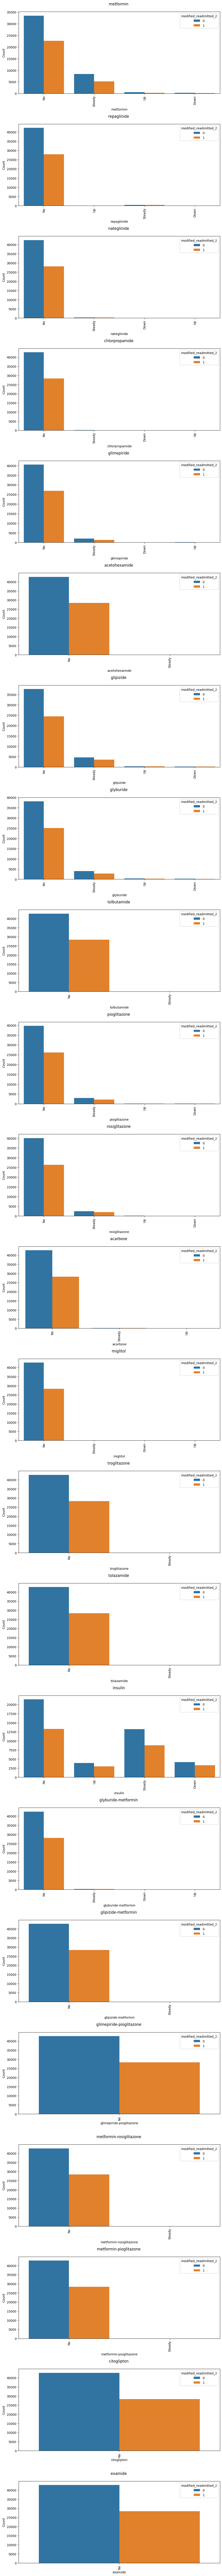

In [69]:
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 5*len(columns)))

for i, column in enumerate(columns):
    ax = sns.countplot(x=column, hue='modified_readmitted_2', data=temp_df, ax=axes[i])
    ax.set_xlabel(column)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_ylabel('Count')
    ax.set_title(f'{column} \n')

plt.tight_layout()
plt.show()

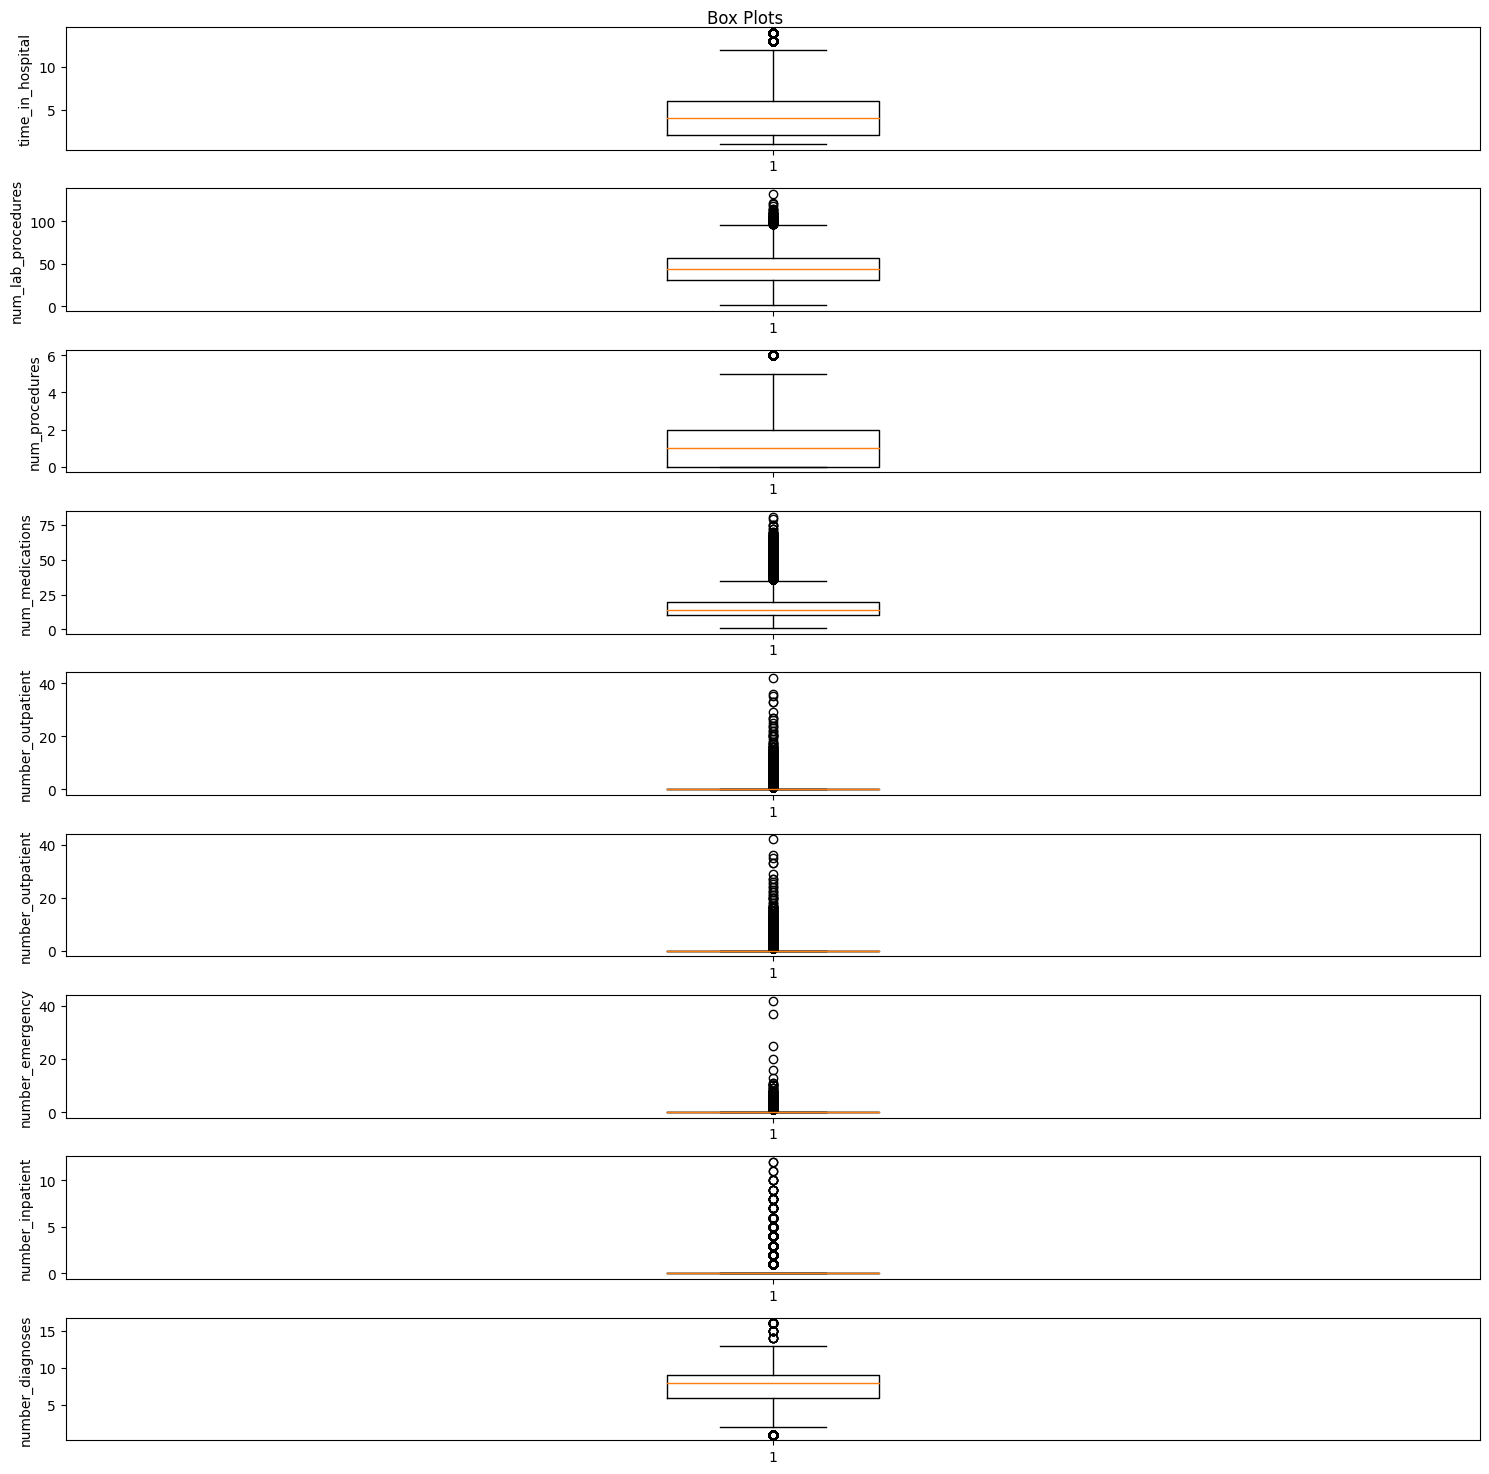

In [70]:
# Trying to identify the columns with the most outliers.
columns_to_plot = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_outpatient' ,'number_emergency', 'number_inpatient', 'number_diagnoses']
subset_df = df[columns_to_plot]

num_plots = len(columns_to_plot)

fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(15, 15))

for i, column in enumerate(columns_to_plot):
    axes[i].boxplot(df[column].values)
    axes[i].set_ylabel(column)

fig.suptitle('Box Plots')

plt.tight_layout()
plt.show()

In [71]:
df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,0,0,0,1,1
age,5,15,25,35,45
admission_type_id,5,1,1,1,1
discharge_disposition_id,18,1,1,1,1
admission_source_id,0,1,1,1,1
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51


In [72]:
df.head().T
print(df.shape)

(71013, 39)


# 5. Classification and Clustering

### 5.1. Encoding data

In [73]:
df.drop(columns = ['readmitted'], inplace = True)

In [74]:
# Seperating numerical and categorical columns

numeric_cols = df.select_dtypes(include=np.number).columns
non_numeric_cols = df.select_dtypes(exclude=np.number).columns

print("Numeric columns:", numeric_cols)
print("Non-numeric columns:", non_numeric_cols)

Numeric columns: Index(['encounter_id', 'patient_nbr', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'tolazamide', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed', 'modified_readmitted_1',
       'modified_readmitted_2', 'modified_readmitted_3'],
      dtype='object')
Non-numeric columns: Index(['race', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult'], dtype='object')


In [75]:
# Perform one-hot encoding on non-numeric columns
df_encoded = pd.get_dummies(df, columns=non_numeric_cols)

In [76]:
df_encoded.head().T

,0,1,2,3,4
encounter_id,2278392.0,149190.0,64410.0,500364.0,16680.0
patient_nbr,8222157.0,55629189.0,86047875.0,82442376.0,42519267.0
gender,0.0,0.0,0.0,1.0,1.0
age,5.0,15.0,25.0,35.0,45.0
admission_type_id,5.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...
max_glu_serum_None,1.0,1.0,1.0,1.0,1.0
A1Cresult_5,0.0,0.0,0.0,0.0,0.0
A1Cresult_7,0.0,0.0,0.0,0.0,0.0
A1Cresult_8,0.0,0.0,0.0,0.0,0.0


In [77]:
# Now We specify X and Y
X = df_encoded.drop(['encounter_id', 'patient_nbr', 'modified_readmitted_1', 'modified_readmitted_2', 'modified_readmitted_3'], axis = 1)
y1 = df_encoded['modified_readmitted_1']
y2 = df_encoded['modified_readmitted_2']
y3 = df_encoded['modified_readmitted_3']

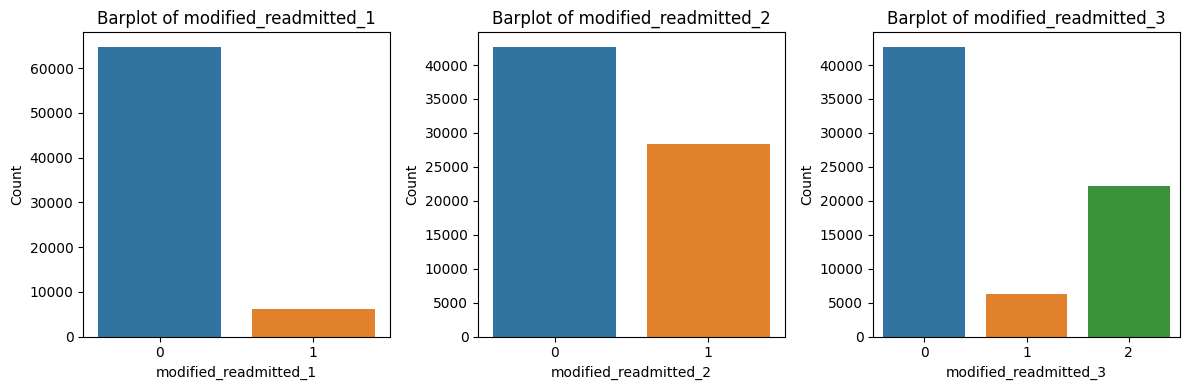

In [78]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot histogram for diag_1
sns.barplot(x = df['modified_readmitted_1'].value_counts().index, y = df['modified_readmitted_1'].value_counts(), ax=axes[0])
axes[0].set_xlabel('modified_readmitted_1')
axes[0].set_ylabel('Count')
axes[0].set_title('Barplot of modified_readmitted_1')

# Plot histogram for diag_2
sns.barplot(x = df['modified_readmitted_2'].value_counts().index, y = df['modified_readmitted_2'].value_counts(), ax=axes[1])
axes[1].set_xlabel('modified_readmitted_2')
axes[1].set_ylabel('Count')
axes[1].set_title('Barplot of modified_readmitted_2')

# Plot histogram for diag_3
sns.barplot(x = df['modified_readmitted_3'].value_counts().index, y = df['modified_readmitted_3'].value_counts(), ax=axes[2])
axes[2].set_xlabel('modified_readmitted_3')
axes[2].set_ylabel('Count')
axes[2].set_title('Barplot of modified_readmitted_3')

plt.tight_layout()
plt.show()

### 5.1.2 A classifier on row modified_readmitted_1 data

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42, stratify=y1)

In [80]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
clf = DecisionTreeClassifier(max_features = 'sqrt', class_weight = "balanced", random_state = 34, splitter = 'best')
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_features='sqrt',
                       random_state=34)

In [82]:
y_pred = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [83]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')
print(classification_report(y_test, y_pred))

Accuracy: 0.852073505597409
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     12959
           1       0.09      0.08      0.08      1244

    accuracy                           0.85     14203
   macro avg       0.50      0.50      0.50     14203
weighted avg       0.84      0.85      0.85     14203



##5.2. Oversampling the data

### 5.2.1 Decision Tree Classifier

In [84]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled)

In [86]:
print(f'X_train: {X_train.shape}\n y_train: {y_train.shape}')

X_train: (82931, 70)
 y_train: (82931,)


In [87]:
print(f'X_test: {X_test.shape}\n y_test: {y_test.shape}')

X_test: (20733, 70)
 y_test: (20733,)


In [88]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [89]:
clf = DecisionTreeClassifier(max_features = 'sqrt', class_weight = "balanced", random_state = 34, splitter = 'best')

In [90]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_features='sqrt',
                       random_state=34)

In [91]:
y_pred = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [92]:
np.bincount(y_train_resampled)

array([51832, 51832])

In [93]:
accuracy_dtree = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_dtree}')
print(classification_report(y_test, y_pred))

Accuracy: 0.7494332706313607
              precision    recall  f1-score   support

           0       0.79      0.67      0.73     10367
           1       0.72      0.82      0.77     10366

    accuracy                           0.75     20733
   macro avg       0.76      0.75      0.75     20733
weighted avg       0.76      0.75      0.75     20733



In [94]:
scores = cross_val_score(clf, X_train_resampled, y_train_resampled, cv = 5, scoring='accuracy')

In [95]:
scores

array([0.76043023, 0.91650991, 0.92340713, 0.9248541 , 0.91853174])

**Cross Validation on DecisionTreeClassifier**

In [96]:
def run_cross_val_on_tree(X, y, depth, cv=10, scoring='accuracy'):
    score_list = []
    mean_list = []
    std_list = []
    acc_score = []
    for d in depth:
        clf = DecisionTreeClassifier(max_depth=d)
        acc_clf = clf.fit(X, y).score(X, y)
        cv_results = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_train_score=True)
        score_list.append(cv_results['test_score'])
        mean_list.append(np.mean(cv_results['test_score']))
        std_list.append(np.std(cv_results['test_score']))
        acc_score.append(acc_clf)
    mean_list = np.array(mean_list)
    std_list = np.array(std_list)
    acc_score = np.array(acc_score)
    return mean_list, std_list, acc_score

In [97]:
def plot_results(mean_list, std_list, acc_score, depth):
    # Plot mean scores with error bars
    plt.errorbar(depth, mean_list, yerr=std_list, fmt='-o')
    plt.xlabel('Depth')
    plt.ylabel('Mean Score')
    plt.title('Mean Cross-Validation Scores with Standard Deviation')
    plt.show()

    # Plot accuracy scores
    plt.bar(depth, acc_score)
    plt.xlabel('Depth')
    plt.ylabel('Accuracy Score')
    plt.title('Accuracy Scores')
    plt.show()

In [98]:
depths = range(1, 10)
mean_list, std_list, acc_score = run_cross_val_on_tree(X, y1, depths, cv = 10, scoring = 'accuracy')

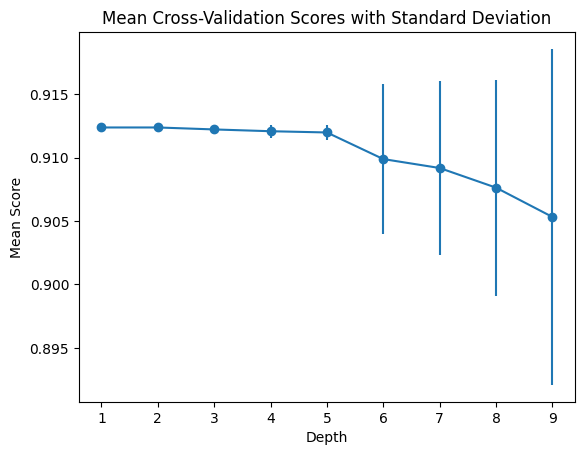

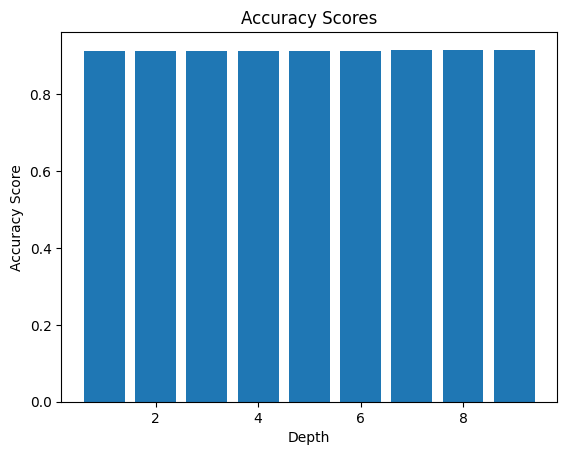

In [99]:
plot_results(mean_list, std_list, acc_score, depths)

In [101]:
arg_max = mean_list.argmax()
best_depth = depths[arg_max]
best_score = mean_list[arg_max]
best_score_std = std_list[arg_max]

print(f'Best depth: {best_depth}, best score: {best_score}, best std score: {best_score_std}')

Best depth: 1, best score: 0.9123822422827791, best std score: 5.2133212829685953e-05


In [102]:
def plot_scores(mean_list, acc_score, depth):
    # Plot mean cross-validation scores
    plt.plot(depth, mean_list, '-o', label='Mean Cross-Validation Scores')
    
    # Plot train scores
    plt.plot(depth, acc_score, '-o', label='Train Scores')
    
    plt.xlabel('Depth')
    plt.ylabel('Score')
    plt.title('Mean Cross-Validation Scores vs Train Scores')
    plt.legend()
    plt.show()


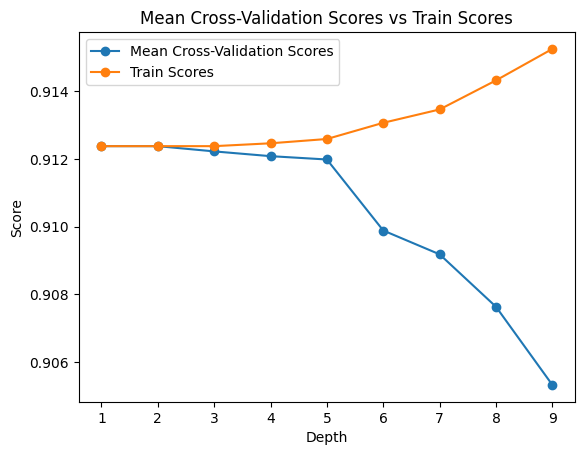

In [103]:
plot_scores(mean_list, acc_score, depths)

### 5.2.2 Random Forest Classifier and performing grid search using cross-val



In [104]:
# Define the RandomForestClassifier
rf = RandomForestClassifier()

# Define the parameter grid for grid search
rf_params = {"max_depth": [3, 5, 7], "n_estimators": [50, 100, 150, 200]}

# Perform grid search using stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_cv_model = GridSearchCV(rf, rf_params, cv=cv, scoring='roc_auc', verbose=2, n_jobs=-1)
rf_cv_model.fit(X_train, y_train)

# Print the best score and best parameters
print("Best AUC Score:", rf_cv_model.best_score_)
print("Best Parameters:", rf_cv_model.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best AUC Score: 0.9283998753724994
Best Parameters: {'max_depth': 7, 'n_estimators': 200}


In [105]:
rf_cv_model.score(X_train, y_train)

0.9309519143410873

In [106]:
rf_predict = rf_cv_model.predict(X_test)
print(classification_report(y_test, rf_predict))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.85      0.88      0.87     10367
           1       0.88      0.84      0.86     10366

    accuracy                           0.86     20733
   macro avg       0.86      0.86      0.86     20733
weighted avg       0.86      0.86      0.86     20733



In [107]:
accuracy_rm = accuracy_score(y_test, rf_predict)
print(accuracy_rm)

0.8632132349394684


### 5.2.3 Logistic Regression

In [108]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [109]:
logisticRegr.predict(X_test[0:10])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [110]:
predictions = logisticRegr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [111]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[10076   291]
 [ 1578  8788]]


In [112]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.9098538561713211


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


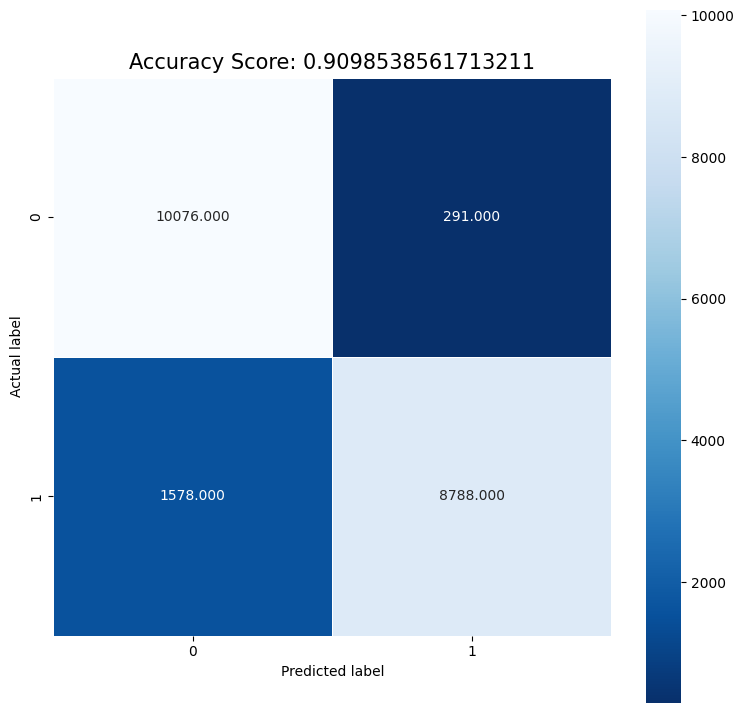

In [236]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [113]:
predict = logisticRegr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [114]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.86      0.97      0.92     10367
           1       0.97      0.85      0.90     10366

    accuracy                           0.91     20733
   macro avg       0.92      0.91      0.91     20733
weighted avg       0.92      0.91      0.91     20733



In [115]:
accuracy_logit = accuracy_score(y_test, predict)
print(accuracy_logit)

0.9098538561713211


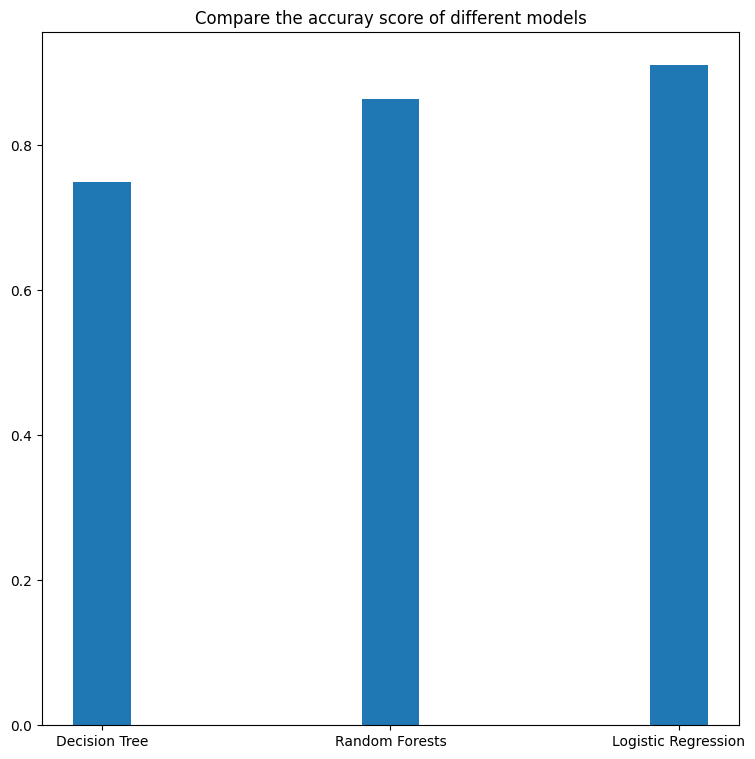

In [116]:
plt.figure(figsize=(9,9))

models = ['Decision Tree', 'Random Forests', 'Logistic Regression']
values = [accuracy_dtree, accuracy_rm, accuracy_logit]
model = np.arange(len(models))

plt.bar(model, values, width = 0.2, label= 'accuracy')
plt.xticks(model, models)
plt.title('Compare the accuray score of different models')

plt.show()           

##5.3 Undersampling the data


### 5.3.1 Decision Tree Classifier

In [117]:
rus = RandomUnderSampler(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42, stratify=y1)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled)

In [119]:
print(f'X_train: {X_train.shape}\n y_train: {y_train.shape}')

X_train: (7964, 70)
 y_train: (7964,)


In [120]:
print(f'X_test: {X_test.shape}\n y_test: {y_test.shape}')

X_test: (1992, 70)
 y_test: (1992,)


In [122]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [123]:
clf = DecisionTreeClassifier(max_features = 'sqrt', class_weight = "balanced", random_state = 34, splitter = 'best')

In [124]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_features='sqrt',
                       random_state=34)

In [125]:
y_pred = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [126]:
accuracy_dtree = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_dtree}')
print(classification_report(y_test, y_pred))

Accuracy: 0.48493975903614456
              precision    recall  f1-score   support

           0       0.47      0.25      0.33       996
           1       0.49      0.72      0.58       996

    accuracy                           0.48      1992
   macro avg       0.48      0.48      0.46      1992
weighted avg       0.48      0.48      0.46      1992



In [127]:
scores = cross_val_score(clf, X_train_resampled, y_train_resampled, cv = 10, scoring='accuracy')

In [128]:
print(score)

0.9098538561713211


In [129]:
depths = range(1, 10)
mean_list, std_list, acc_score = run_cross_val_on_tree(X, y1, depths, cv = 10, scoring = 'accuracy')

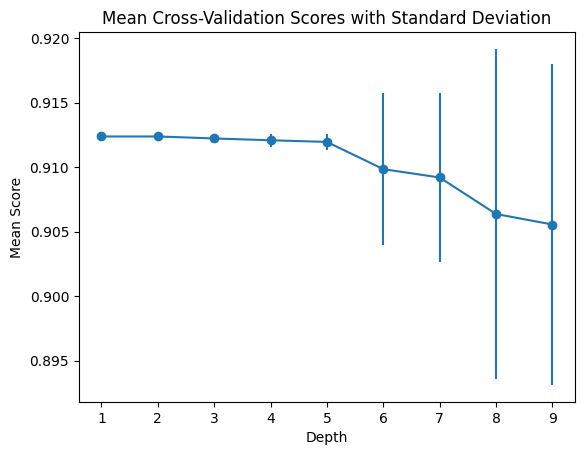

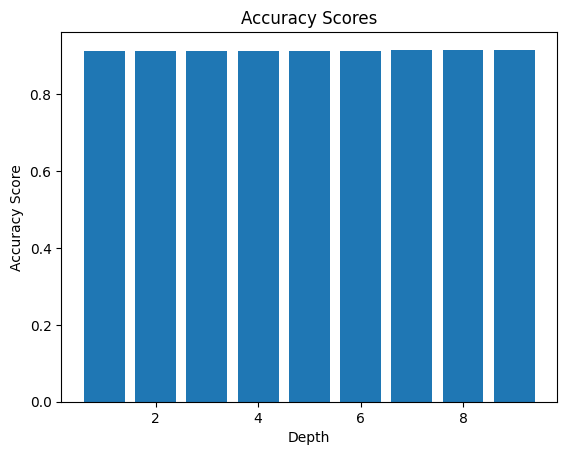

In [130]:
plot_results(mean_list, std_list, acc_score, depths)

In [131]:
arg_max = mean_list.argmax()
best_depth = depths[arg_max]
best_score = mean_list[arg_max]
best_score_std = std_list[arg_max]
cross_val_accuracy_dtree = best_score
print(f'Best depth: {best_depth}, best score: {best_score}, best std score: {best_score_std}')

Best depth: 1, best score: 0.9123822422827791, best std score: 5.2133212829685953e-05


### 5.3.2 Random Forest Classifier and performing grid search using cross-val



In [132]:
# Define the RandomForestClassifier
rf = RandomForestClassifier()

# Define the parameter grid for grid search
rf_params = {"max_depth": [3, 5, 7], "n_estimators": [50, 100, 150, 200]}

# Perform grid search using stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_cv_model = GridSearchCV(rf, rf_params, cv=cv, scoring='roc_auc', verbose=2, n_jobs=-1)
rf_cv_model.fit(X_train, y_train)

# Print the best score and best parameters
print("Best AUC Score:", rf_cv_model.best_score_)
print("Best Parameters:", rf_cv_model.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best AUC Score: 0.6287724244761825
Best Parameters: {'max_depth': 7, 'n_estimators': 150}


In [133]:
rf_cv_model.score(X_train, y_train)

0.7249079925460655

In [134]:
rf_predict = rf_cv_model.predict(X_test)
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       0.52      0.95      0.67       996
           1       0.69      0.12      0.20       996

    accuracy                           0.53      1992
   macro avg       0.61      0.53      0.44      1992
weighted avg       0.61      0.53      0.44      1992



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [135]:
accuracy_rm = accuracy_score(y_test, rf_predict)
print(accuracy_rm)

0.5331325301204819


### 5.3.3 Logistic Regression

In [136]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [137]:
logisticRegr.predict(X_test[0:10])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [138]:
predictions = logisticRegr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [139]:
score = logisticRegr.score(X_test, y_test)
accuracy_logit = accuracy_score(y_test, predictions)
print(score)

0.5431726907630522


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [140]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[608 388]
 [522 474]]


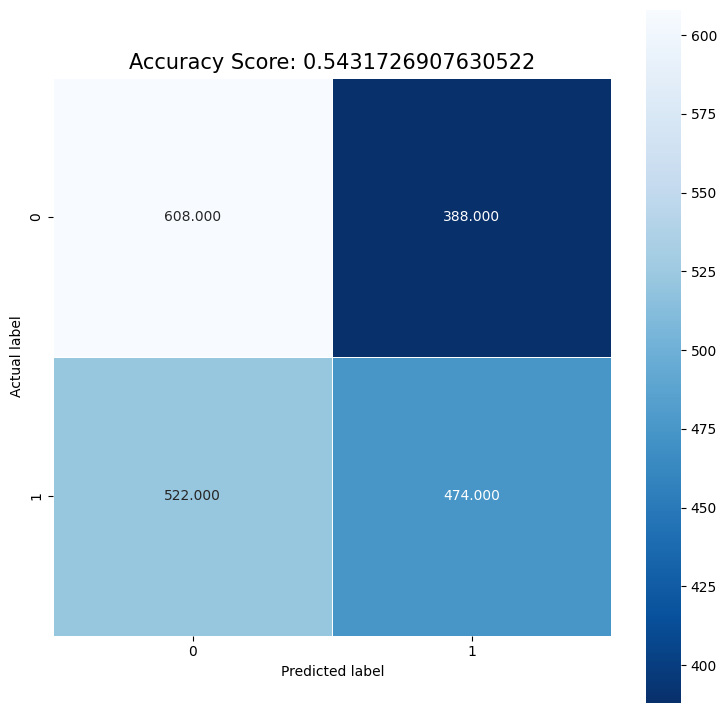

In [141]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

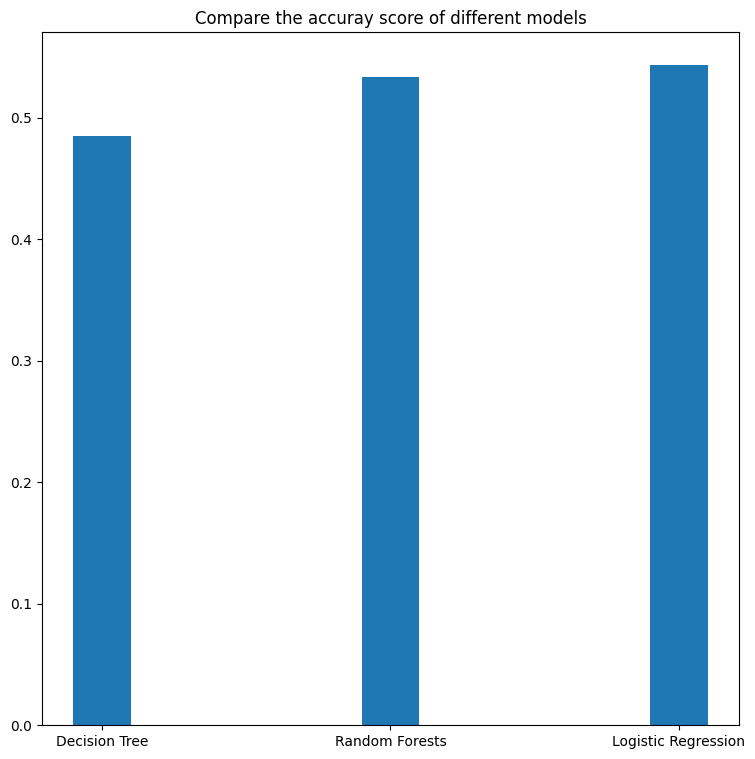

In [150]:
plt.figure(figsize=(9,9))

models = ['Decision Tree', 'Random Forests', 'Logistic Regression']
values = [accuracy_dtree, accuracy_rm, accuracy_logit]
model = np.arange(len(models))

plt.bar(model, values, width = 0.2, label= 'accuracy')
plt.xticks(model, models)
plt.title('Compare the accuray score of different models')

plt.show()           

## 5.4. Clustering using K-Means




In [148]:
new_df = df_encoded.drop(['encounter_id', 'patient_nbr', 'modified_readmitted_1', 'modified_readmitted_2', 'modified_readmitted_3', 'change'], axis = 1)

In [149]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(new_df)

# Transform the data
scaled_data = scaler.fit_transform(X)

# Print the scaled data
print(scaled_data)

[[-0.93651575 -3.80996155  2.3079363  ... -0.20526228 -0.30989007
   0.46983182]
 [-0.93651575 -3.18261692 -0.61412813 ... -0.20526228 -0.30989007
   0.46983182]
 [-0.93651575 -2.5552723  -0.61412813 ... -0.20526228 -0.30989007
   0.46983182]
 ...
 [-0.93651575 -0.04589378 -0.61412813 ... -0.20526228 -0.30989007
   0.46983182]
 [-0.93651575  1.20879547 -0.61412813 ... -0.20526228 -0.30989007
   0.46983182]
 [ 1.0677877   0.58145084 -0.61412813 ... -0.20526228 -0.30989007
   0.46983182]]


In [275]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_data)
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [276]:
cluster_labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [277]:
score = metrics.accuracy_score(y1, kmeans.predict(scaled_data))
print('Accuracy:{0:f}'.format(score))

Accuracy:0.336671


In [278]:
# Apply PCA to the scaled data
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(scaled_data)

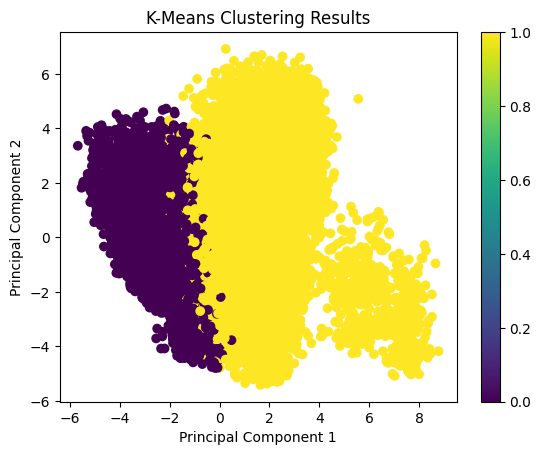

In [279]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results')
plt.colorbar()
plt.show()

###5.4.1 Selected Features

In [214]:
df2 = new_df[['time_in_hospital', 'num_lab_procedures', 'num_medications']]

In [215]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(df2)

# Transform the data
scaled_data = scaler.fit_transform(X)

# Print the scaled data
print(scaled_data)

[[-0.93651575 -3.80996155  2.3079363  ... -0.20526228 -0.30989007
   0.46983182]
 [-0.93651575 -3.18261692 -0.61412813 ... -0.20526228 -0.30989007
   0.46983182]
 [-0.93651575 -2.5552723  -0.61412813 ... -0.20526228 -0.30989007
   0.46983182]
 ...
 [-0.93651575 -0.04589378 -0.61412813 ... -0.20526228 -0.30989007
   0.46983182]
 [-0.93651575  1.20879547 -0.61412813 ... -0.20526228 -0.30989007
   0.46983182]
 [ 1.0677877   0.58145084 -0.61412813 ... -0.20526228 -0.30989007
   0.46983182]]


In [216]:
k_values = range(1, 11)
sse = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

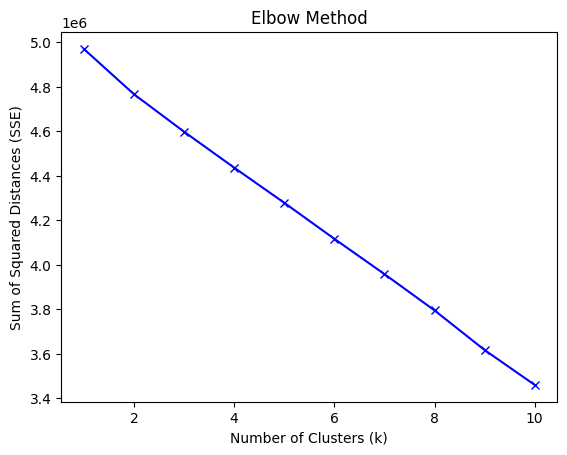

In [217]:
plt.plot(k_values, sse, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method')
plt.show()

In [218]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled_data)
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [219]:
cluster_labels

array([2, 0, 0, ..., 0, 0, 0], dtype=int32)

In [220]:
score = metrics.accuracy_score(y1, kmeans.predict(scaled_data))
print('Accuracy:{0:f}'.format(score))

Accuracy:0.589962


In [212]:
# Apply PCA to the scaled data
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(scaled_data)

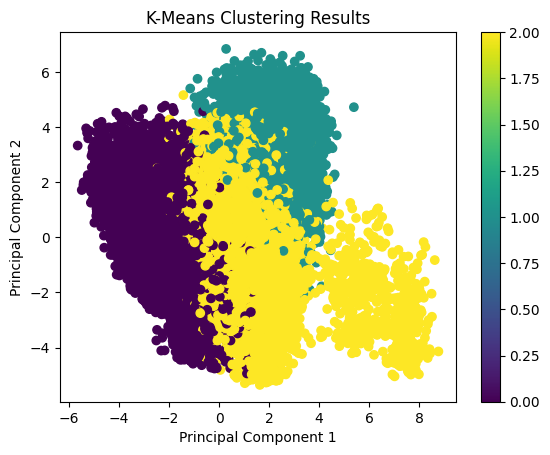

In [213]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results')
plt.colorbar()
plt.show()